In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../data/all_data.csv', sep=';')
data.head()

,mid,Act1A1,Act1A2,Act2A1,Act2A2,ReasA1,ReasA2,REA1,REA2,NumTA1,...,T3TyA1,T3TyA2,T3SubjA1,T3SubjA2,sender,date,message_id,subject,body,folder
0,103944,greet,greet,{},{},personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<13973474.1075847200439.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,Tanya_Jones_Dec2000Notes FoldersSent
1,33081,deliver,request,{},{},administrative procedure,internal collaboration,accountable non-answer,postponed reply,1,...,NaN,NaN,{},{},richard.b.sanders@enron.com,2001-02-28,<7857698.1075853272620.JavaMail.evans@thyme>,Re: HEOF,"Frankly, I don t remember it. Ask Linda.\tAndr...",Richard_Sanders_Oct2001Notes FoldersSent
2,103941,deliver,deliver,{},propose,personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<10528202.1075847200508.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,"It s really all Genia s fault, she goes to lun...",Tanya_Jones_Dec2000Notes FoldersSent
3,103860,deliver,remind,{},{},administrative procedure,legal procedure,immediate reply,immediate reply,1,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-18,<23700686.1075847202393.JavaMail.evans@thyme>,Re: EnronOnline LLC and Enron North America Corp.,JustinI ve been running around trying to deter...,Tanya_Jones_Dec2000Notes FoldersSent
4,321253,commit,deliver,{},{},employment arrangements,personal,postponed reply,ignore,1,...,NaN,NaN,{},{},j.kaminski@enron.com,2001-07-23,<30497387.1075863431760.JavaMail.evans@thyme>,RE: Christian,"Paul, I hope you feel better. I have seen the ...","VKAMINS (Non-Privileged)Kaminski, Vince JSent ..."


In [3]:
# Keep only body and annotator 1 columns

annotator_one = data[['Act1A1', 'ReasA1', 'REA1', 'NumTA1', 'body']]
annotator_one.head()

,Act1A1,ReasA1,REA1,NumTA1,body
0,greet,personal,accountable non-answer,0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...
1,deliver,administrative procedure,accountable non-answer,1,"Frankly, I don t remember it. Ask Linda.\tAndr..."
2,deliver,personal,accountable non-answer,0,"It s really all Genia s fault, she goes to lun..."
3,deliver,administrative procedure,immediate reply,1,JustinI ve been running around trying to deter...
4,commit,employment arrangements,postponed reply,1,"Paul, I hope you feel better. I have seen the ..."


In [6]:
encoded_annotator_one = pd.get_dummies(annotator_one, columns=['Act1A1', 'ReasA1', 'REA1', 'NumTA1'])
encoded_annotator_one.head()

,body,Act1A1_amend,Act1A1_commit,Act1A1_deliver,Act1A1_greet,Act1A1_propose,Act1A1_refuse,Act1A1_remind,Act1A1_request,Act1A1_{},...,NumTA1_0,NumTA1_1,NumTA1_2,NumTA1_3,NumTA1_4,NumTA1_6,NumTA1_climatic changes,NumTA1_profiling,NumTA1_to look a agreement,NumTA1_{}
0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,"Frankly, I don t remember it. Ask Linda.\tAndr...",False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,"It s really all Genia s fault, she goes to lun...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,JustinI ve been running around trying to deter...,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,"Paul, I hope you feel better. I have seen the ...",False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [7]:
encoded_annotator_one.keys()

Index(['body', 'Act1A1_amend', 'Act1A1_commit', 'Act1A1_deliver',
       'Act1A1_greet', 'Act1A1_propose', 'Act1A1_refuse', 'Act1A1_remind',
       'Act1A1_request', 'Act1A1_{}', 'ReasA1_administrative procedure',
       'ReasA1_employment arrangements', 'ReasA1_external collaboration',
       'ReasA1_internal collaboration', 'ReasA1_legal procedure',
       'ReasA1_logistic arrangements', 'ReasA1_other', 'ReasA1_personal',
       'ReasA1_travel planning', 'ReasA1_{}', 'REA1_accountable non-answer',
       'REA1_ignore', 'REA1_immediate reply', 'REA1_postponed reply',
       'REA1_{}', 'NumTA1_*no email so leaving fields blank*', 'NumTA1_0',
       'NumTA1_1', 'NumTA1_2', 'NumTA1_3', 'NumTA1_4', 'NumTA1_6',
       'NumTA1_climatic changes', 'NumTA1_profiling',
       'NumTA1_to look a agreement', 'NumTA1_{}'],
      dtype='object')

In [8]:
clean_encoded_annotator_one = encoded_annotator_one.drop(['Act1A1_{}', 'ReasA1_{}', 'REA1_{}', 'NumTA1_{}',
                                                           'NumTA1_*no email so leaving fields blank*', 'NumTA1_4', 'NumTA1_6', 'NumTA1_climatic changes', 'NumTA1_profiling', 'NumTA1_to look a agreement'], axis=1)
clean_encoded_annotator_one.keys()

Index(['body', 'Act1A1_amend', 'Act1A1_commit', 'Act1A1_deliver',
       'Act1A1_greet', 'Act1A1_propose', 'Act1A1_refuse', 'Act1A1_remind',
       'Act1A1_request', 'ReasA1_administrative procedure',
       'ReasA1_employment arrangements', 'ReasA1_external collaboration',
       'ReasA1_internal collaboration', 'ReasA1_legal procedure',
       'ReasA1_logistic arrangements', 'ReasA1_other', 'ReasA1_personal',
       'ReasA1_travel planning', 'REA1_accountable non-answer', 'REA1_ignore',
       'REA1_immediate reply', 'REA1_postponed reply', 'NumTA1_0', 'NumTA1_1',
       'NumTA1_2', 'NumTA1_3'],
      dtype='object')

In [9]:
clean_encoded_annotator_one.head()

,body,Act1A1_amend,Act1A1_commit,Act1A1_deliver,Act1A1_greet,Act1A1_propose,Act1A1_refuse,Act1A1_remind,Act1A1_request,ReasA1_administrative procedure,...,ReasA1_personal,ReasA1_travel planning,REA1_accountable non-answer,REA1_ignore,REA1_immediate reply,REA1_postponed reply,NumTA1_0,NumTA1_1,NumTA1_2,NumTA1_3
0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,"Frankly, I don t remember it. Ask Linda.\tAndr...",False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,"It s really all Genia s fault, she goes to lun...",False,False,True,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,JustinI ve been running around trying to deter...,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
4,"Paul, I hope you feel better. I have seen the ...",False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [22]:
count_columns = {}
for series_name, series in clean_encoded_annotator_one.items():
    count_columns[series_name] = series.sum()

count_columns.pop('body')

count_columns

{'Act1A1_amend': 20,
 'Act1A1_commit': 44,
 'Act1A1_deliver': 498,
 'Act1A1_greet': 89,
 'Act1A1_propose': 120,
 'Act1A1_refuse': 11,
 'Act1A1_remind': 88,
 'Act1A1_request': 271,
 'ReasA1_administrative procedure': 220,
 'ReasA1_employment arrangements': 27,
 'ReasA1_external collaboration': 76,
 'ReasA1_internal collaboration': 460,
 'ReasA1_legal procedure': 55,
 'ReasA1_logistic arrangements': 43,
 'ReasA1_other': 64,
 'ReasA1_personal': 176,
 'ReasA1_travel planning': 17,
 'REA1_accountable non-answer': 516,
 'REA1_ignore': 139,
 'REA1_immediate reply': 235,
 'REA1_postponed reply': 235,
 'NumTA1_0': 563,
 'NumTA1_1': 523,
 'NumTA1_2': 40,
 'NumTA1_3': 11}

([<matplotlib.axis.XTick at 0x17465e12fc0>,
 [Text(0, 0, 'Act1A1_amend'),
  Text(1, 0, 'Act1A1_commit'),
  Text(2, 0, 'Act1A1_deliver'),
  Text(3, 0, 'Act1A1_greet'),
  Text(4, 0, 'Act1A1_propose'),
  Text(5, 0, 'Act1A1_refuse'),
  Text(6, 0, 'Act1A1_remind'),
  Text(7, 0, 'Act1A1_request'),
  Text(8, 0, 'ReasA1_administrative procedure'),
  Text(9, 0, 'ReasA1_employment arrangements'),
  Text(10, 0, 'ReasA1_external collaboration'),
  Text(11, 0, 'ReasA1_internal collaboration'),
  Text(12, 0, 'ReasA1_legal procedure'),
  Text(13, 0, 'ReasA1_logistic arrangements'),
  Text(14, 0, 'ReasA1_other'),
  Text(15, 0, 'ReasA1_personal'),
  Text(16, 0, 'ReasA1_travel planning'),
  Text(17, 0, 'REA1_accountable non-answer'),
  Text(18, 0, 'REA1_ignore'),
  Text(19, 0, 'REA1_immediate reply'),
  Text(20, 0, 'REA1_postponed reply'),
  Text(21, 0, 'NumTA1_0'),
  Text(22, 0, 'NumTA1_1'),
  Text(23, 0, 'NumTA1_2'),
  Text(24, 0, 'NumTA1_3')])

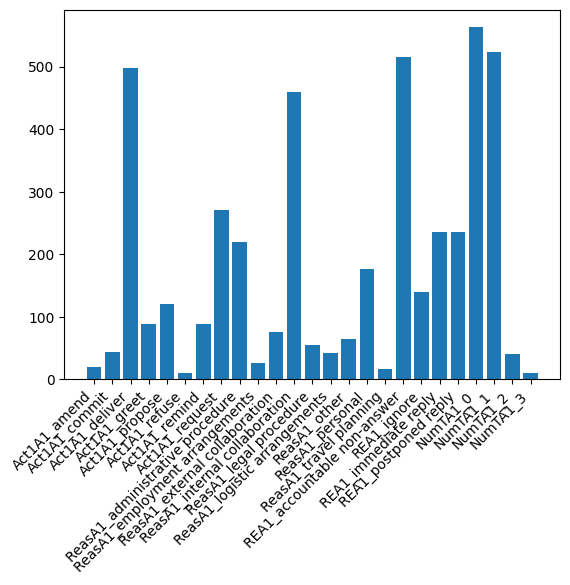

In [25]:
# plot the count of each category

plt.bar(range(len(count_columns)), list(count_columns.values()), align='center')
plt.xticks(range(len(count_columns)), list(count_columns.keys()), rotation=45, ha='right')


In [27]:
# save to csv

clean_encoded_annotator_one.to_csv('../data/annotator_one_hot_encoded.csv', index=False)